# Luise Hauptmann

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Business Context
Electronic news portals are an excellent tool used to instantly receive updates on global events and news stories. The information displayed on the portal originates from online databases, processed by software, and then can be accessed by the user. 

E-news Express is seeking to expand its business by gaining new subscribers. The company is analyzing user actions in order to better understand user interest and determine how to increase engagement. The executives believe that monthly subscriptions are down due to an outdated user interface on the webpage. 

#### Objectives
E-news Express' design team has created a new landing page featuring a new outline and curated content. To test if the new landing page is more engaging than the old landing page, 100 users were randomly selected for a test. The users were divided equally into two groups and were shown the old landing page (control) and the new landing page (treatment) based on their respective group. 

As a data scientist at E-news Express, I will explore the data and perform a statistical analysis at a significance level of 5% to determine if the new landing page is more effective at gathering new subscribers. 

**Questions to answer:**
1. Do users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?
 

#### Data Dictionary
1. user_id 
    * The ID of the individual visiting the website. 
2. group 
    * determines if the user is in the control group or the treatment group.
3. landing_page 
    * ascertains if the landing page is new or old. 
4. time_spent_on_the_page 
    * how much time (in minutes) is spent on the page.
5. converted 
    * delineates if the user is converted to a subscriber or not
6. language_preferred 
    * the preferred language to view the landing page based on the user's choice. 

## Import all the necessary libraries

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as stats 

In [2]:
# check scipy version 
import scipy
scipy.__version__

'1.7.3'

## Reading the Data into a DataFrame

In [3]:
# read the data into a dataframe
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# shape of the dataset
df.shape

(100, 6)

Insights: 
* The dataset has 100 rows and 6 columns.
* There are a total of 100 observations in the sample. 

In [7]:
# collect info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
# change user_id to an string
df['user_id']=df['user_id'].astype(object)

In [9]:
# check the type of 'user_id'
df['user_id'].apply(type).value_counts()

<class 'int'>    100
Name: user_id, dtype: int64

In [10]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Insights: 
* Mean time spent on page is 5.38 minutes.
* Standard deviation is 2.38 minutes. 
* The minimum time spent on the page is 0.19 minutes.
* The median time spent on the page is 5.42 minutes.
* The maximum time spent on the page is 10.71 minutes.

In [11]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Insights: 
*  There are no missing values in the dataset.

In [12]:
# check for duplicates
df.duplicated().sum()

0

Insights: 
* There are no duplicates in the dataset.

### Univariate Analysis

In [13]:
# user_id
df['user_id'].value_counts().reset_index()

,index,user_id
0,546592,1
1,546590,1
2,546444,1
3,546452,1
4,546476,1
...,...,...
95,546464,1
96,546575,1
97,546471,1
98,546586,1


##### Observations
* There are 100 unique users in the dataset. 

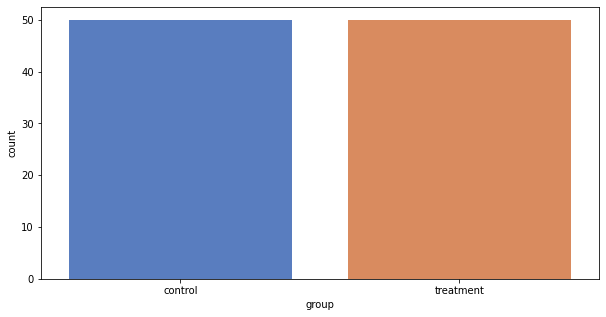

In [14]:
# group
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'group',palette='muted');

##### Observations
* 50% of users were in the control group.
* 50% of users were in the treatment group. 

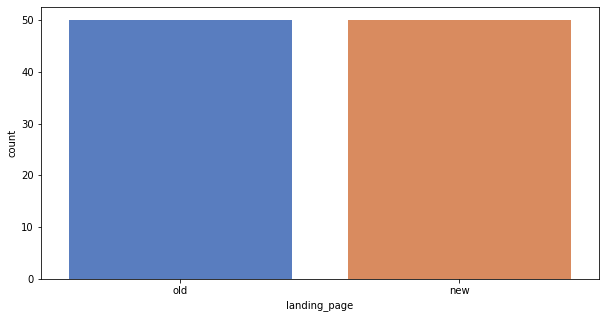

In [15]:
# landing_page
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'landing_page',palette='muted');

##### Observations
* Those who were in the control group were shown the old landing page. 
* Those who were in the treatment group were shown the new landing page. 

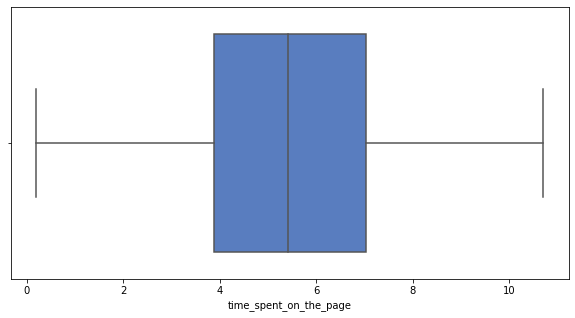

In [16]:
# time_spent_on_the_page
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x= 'time_spent_on_the_page',palette='muted');

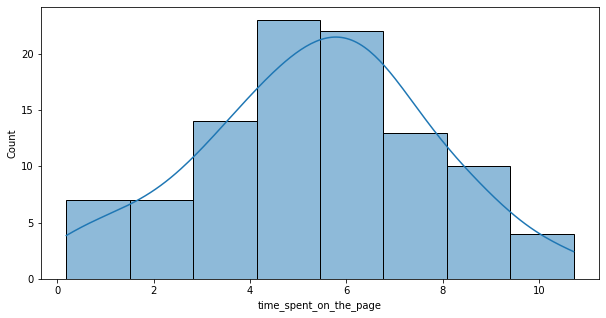

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'time_spent_on_the_page',palette='muted',kde='True');

##### Observations
* The median time spent on the page is between 5-6 minutes. 
* Time spent on page is normally distributed with no skew. 

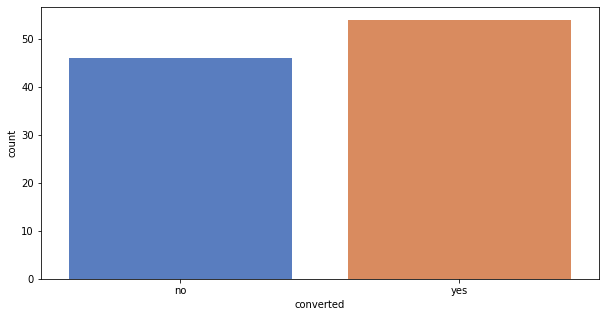

In [18]:
# converted
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'converted',palette='muted');

###### Observations
* Over 50% of respondents were converted to the new page. 

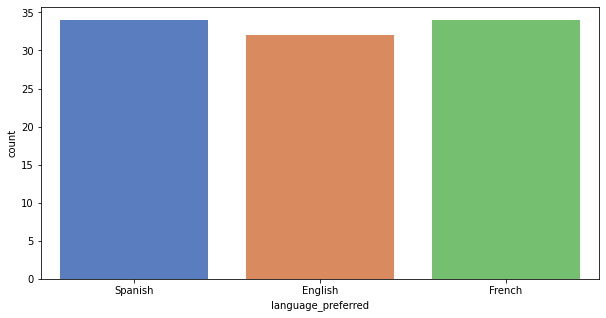

In [19]:
# language_preferred
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'language_preferred',palette='muted');

###### Observations
* The most preferred languages were French and Spanish, followed by English. 

### Bivariate Analysis

#### USER ID AND TIME SPENT ON PAGE

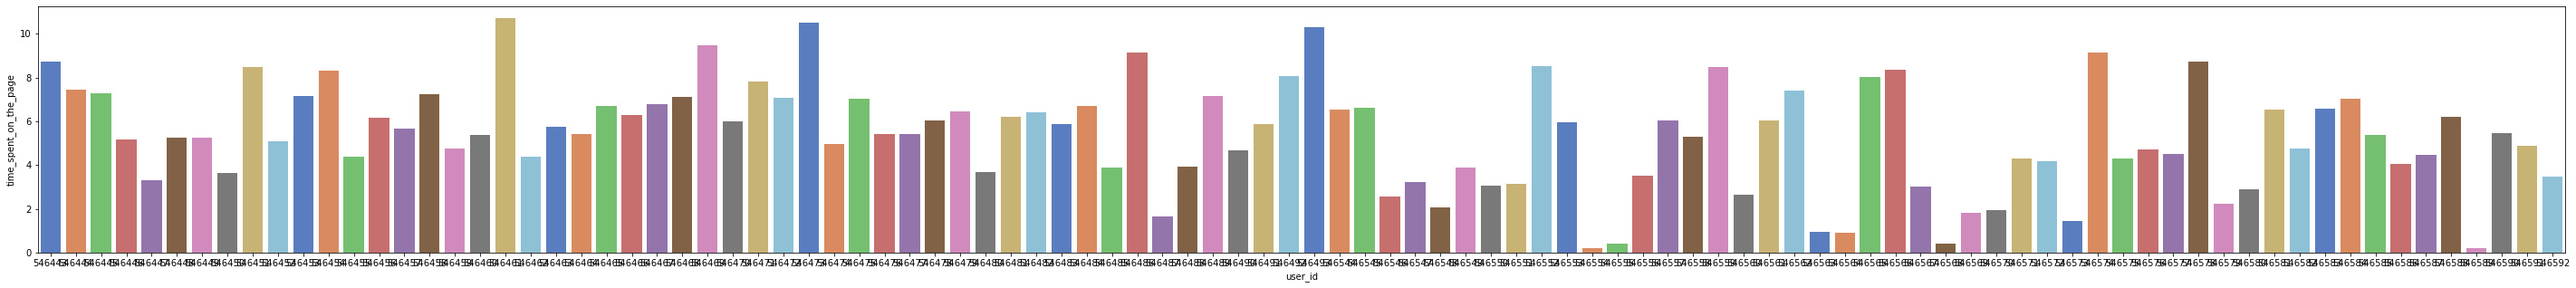

In [20]:
# user_id, time spent on page 
plt.figure(figsize=(50,5))
sns.barplot(data=df, x= 'user_id', y='time_spent_on_the_page', palette='muted');

###### OBSERVATIONS:
* There is no uniform distribution based on the user id and the time they spent on the page. 

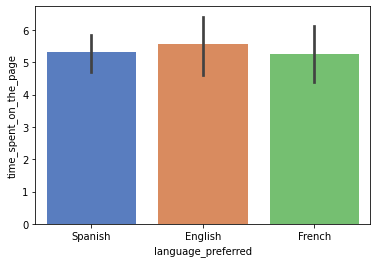

In [21]:
# preferred language and time spent on page

sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='muted');


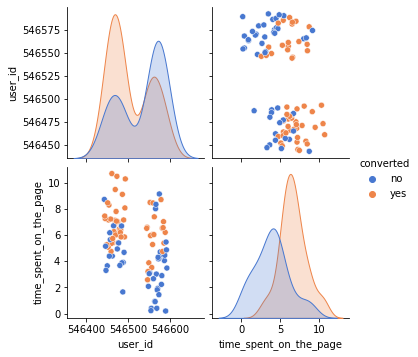

In [22]:
sns.pairplot(df, hue='converted',palette='muted');

###### OBSERVATIONS:
* English users spend the most time on the page followed by Spanish and French. 

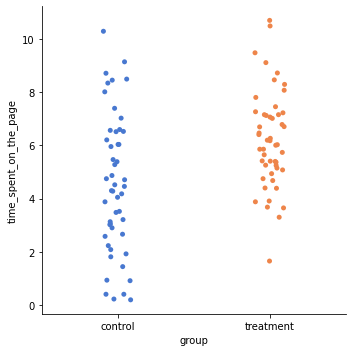

In [23]:
#group by time
sns.catplot(data=df, x = 'group', y='time_spent_on_the_page', palette='muted');

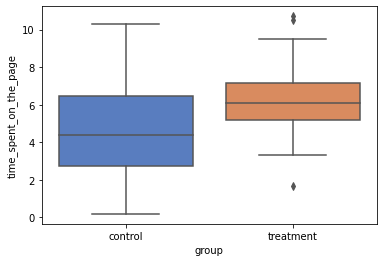

In [24]:
sns.boxplot(data=df, x = 'group', y='time_spent_on_the_page', palette='muted');

###### OBSERVATIONS:
* The treatment group, on average, spends more time on the page than the control group. 

In [25]:
# LANDING PAGE BY CONVERTED
landing_page_ct = pd.crosstab(df['converted'],df['landing_page'])

landing_page_ct

landing_page,new,old
converted,,
no,17,29
yes,33,21


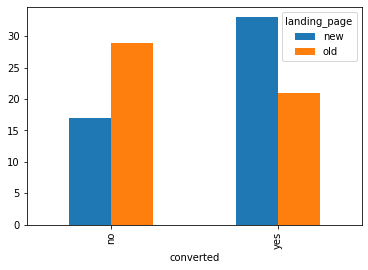

In [26]:
landing_page_ct.plot.bar();

###### OBSERVATIONS:
* 12 more users on the new page are converted to the new landing page compared to the old page. 
* The old page is less likely to convert to the new landing page. 
* There is a strong correlation between the new landing page and conversion rate. 

In [27]:
# GROUP BY LANDING PAGE
groupbylang_ct = pd.crosstab(df['group'],df['landing_page'])

groupbylang_ct

landing_page,new,old
group,,
control,0,50
treatment,50,0


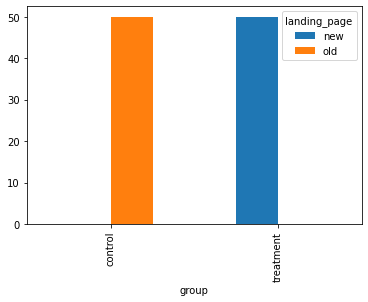

In [28]:
groupbylang_ct.plot.bar();

###### OBSERVATIONS:
* As suggested in the outline, those who viewed the new landing page are in the treatment group. Those who viewed the old landing page are in the control group. 
* There is a perfect 50/50 split between the control group and the treatment group. 

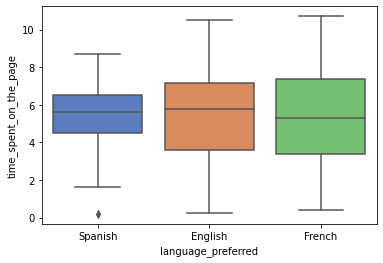

In [29]:
# TIME BY LANGUAGE
sns.boxplot(data=df, x = 'language_preferred', y='time_spent_on_the_page', palette='muted');

###### OBSERVATIONS:
* There seems to be little difference between the median time individuals spent on the landing page based on their preferred language. 

In [30]:
# LANGUAGE BY CONVERSION
langbyconv_ct = pd.crosstab(df['language_preferred'],df['converted'])

langbyconv_ct

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


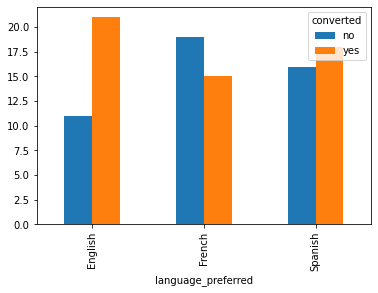

In [31]:
langbyconv_ct.plot.bar();

###### OBSERVATIONS:
* English users are more likely to be converted to subscribers. They are followed by Spanish users at 18 conversions, and French users at 15 conversions. 
* Those who preferred French as their viewing language are less likely to convert to the new page than other users. 
* However, there may be other factors at play for the correlation between preferred language and conversion rate. Correlation does not equate causation. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

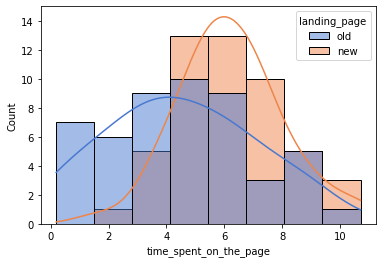

In [32]:
plt.figure
sns.histplot(data=df, x='time_spent_on_the_page',hue='landing_page',palette='muted',kde=True);
plt.show()

###### Observations
* Both landing pages are normally distributed. 
* Individuals who viewed the old landing page appear to spend less time on average than those on the new page. 

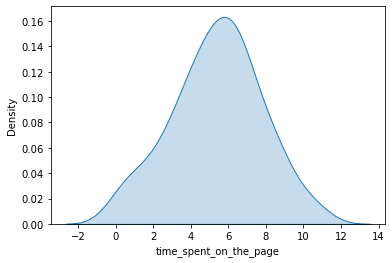

In [33]:
# plot the distribution of time spent on the page
sns.kdeplot(df['time_spent_on_the_page'],shade='True', palette='muted');

###### Observations
* Time spent on the page is normally distributed with no skewness. 
* Most participants spend between 5 and 6 minutes on the page. 

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the mean time spent on the **new landing page** and **existing landing page** respectively.

#### Null Hypothesis: 
* Users spend equal time on the new landing page as the existing landing page.
* $H_0:\mu_1=\mu_2$

#### Alternate Hypothesis:
* Users spend more time on the new landing page when compared to the existing landing page. 
* $H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

Test significance
* We are testing for the equality of two population means wherein the null hypothesis is $H_0:\mu_1=\mu_2$

Assumptions
* The data is continuous.
* The population is normally distributed.
* The two populations are independent of one another. 
* The standard deviation of the population is unknown. 

Therefore
* **two sample independent sample t-test is used.** 

### Step 3: Decide the significance level

* As outlined in the business context and objectives, the significance level for this project is .05

### Step 4: Collect and prepare data

In [34]:
new_page=df.query('landing_page=="new"')['time_spent_on_the_page']
existing_page=df.query('landing_page=="old"')['time_spent_on_the_page']

In [35]:
df.groupby('landing_page').describe()
# find sample mean and sample standard deviation based on landing_page
# sample mean for new is 6.22
# sample mean for old is 4.53 

time_spent_on_the_page                                        \
                              count    mean       std   min    25%    50%   
landing_page                                                                
new                            50.0  6.2232  1.817031  1.65  5.175  6.105   
old                            50.0  4.5324  2.581975  0.19  2.720  4.380   

                             
                 75%    max  
landing_page                 
new           7.1600  10.71  
old           6.4425  10.30

### Step 5: Calculate the p-value

In [36]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_page, existing_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [37]:
# if-else loop to compare the p-value
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis')

The p-value is less than the level of significance; therefore, we reject the null hypothesis.


### Step 7:  Draw inference

* The p-value .000139 is less than the level of significance (.05); therefore, we reject the null hypothesis because there is not enough evidence to support that users spend the same amount of time on the existing page as the new page. 
* Therefore we can say that there is enough statistical evidence to support the assertion that users spend more time on the new page than the existing page. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

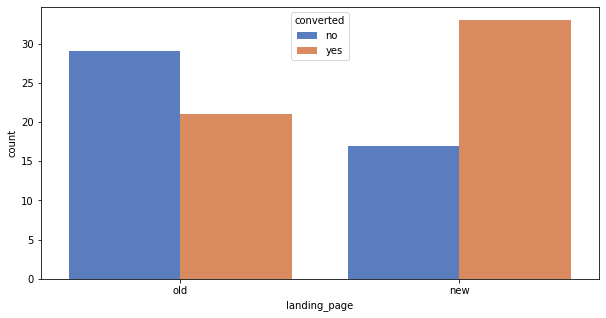

In [38]:
# visual analysis
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'landing_page',hue='converted', palette='muted');

In [39]:
# visual analysis
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

###### Observations:
* More users converted on the new landing page compared to the old landing page. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the conversion rate for the **new landing page** and **existing landing page** respectively.

#### Null Hypothesis: 
* The conversion rate for the new page is the same as the conversion rate for the old page.
* $H_0:\mu_1=\mu_2$

#### Alternate Hypothesis:
* The conversion rate for the new page is greater than the conversion rate for the old page. 
* $H_a:\mu_1 \neq \mu_2$

### Step 2: Select Appropriate test

Test significance
* We are comparing two sample proportions from two populations wherein the null hypothesis is $H_0:\mu_1=\mu_2$

Assumptions
* The variables are categorical. 
* Binomially distributed populations. 
* The two populations are independent of one another. 
* Random sampling. 

Therefore
* **the two proportions z-test is used.** 

### Step 3: Decide the significance level

As outlined in the problem statement, the level of significance will be .05.

### Step 4: Collect and prepare data

In [40]:
# print data frame to view data counts for landing page 
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [41]:
# view how many individuals were converted using the new landing page 
new_conv=df[df['landing_page']=='new']['converted'].value_counts()['yes']
print(new_conv, 'out of 50 people were converted using the new landing page')

33 out of 50 people were converted using the new landing page


In [42]:
# view how many users were converted using the old landing page 
existing_conv=df[df['landing_page']=='old']['converted'].value_counts()['yes']
print(existing_conv, 'out of 50 people were converted using the existing landing page')

21 out of 50 people were converted using the existing landing page


### Step 5: Calculate the p-value

In [43]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions items
conv_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conv_count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [44]:
#if-else statement to compare the p-value with alpha
 
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis')

The p-value is less than the level of significance; therefore, we reject the null hypothesis.


### Step 7:  Draw inference

* As the p-value is less than 0.05, we reject the null hypothesis that the conversion rate for the new page and the old page are the same. 
* There is enough statistical evidence to support the assertion that the new page has a higher conversion rate than the old page. 

## 3. Is the conversion and preferred language are independent or related?

In [45]:
# visual analysis
df.groupby(['language_preferred'])['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

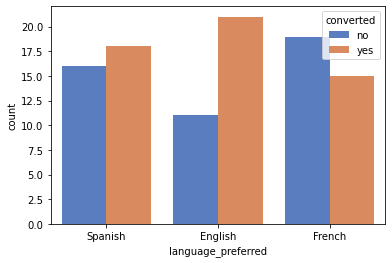

In [46]:
# show the relationship between language and conversion rate 
sns.countplot(data=df, x='language_preferred', hue='converted', palette='muted');

###### Observations:
* Spanish and English users were more likely to convert than their French counterparts. 
* English had the highest difference in conversion with nearly twice as many conversions than non conversions. 

### Step 1: Define the null and alternate hypotheses

The two variables tested will be conversion rate and preferred language. 

#### Null Hypothesis: 
* $H_0:$ In a contingency table, the conversion rate is independent of preferred language. 

#### Alternate Hypothesis:
* $H_a:$ In a contingency table, the conversion rate is dependent on preferred language. 

### Step 2: Select Appropriate test 

Test significance
* We are comparing two variables wherein the null hypothesis is $H_0:$ the row and column variables are independent. 

Assumptions
* The variables are categorical. 
* Expected value of the number of sample observations in each level of the variable is at least 5. 
* Random sampling is used for this experiment. 

Therefore
* **The Chi-square test of independence is the appropriate test.** 

### Step 3: Decide the significance level

As outlined in the problem statement, the level of significance will be .05.

### Step 4: Collect and prepare data

In [47]:
# show converted by preferred language 
df.groupby(['language_preferred'])['converted'].value_counts()
# check the value counts in a table

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

In [48]:
# create a contingency table 
cont_table = pd.crosstab(df['converted'],df['language_preferred'])

cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [49]:
# find the p-value
# import required function
from scipy.stats import chi2_contingency

# calculate the p-value using the information from the contingency table. 
chi, p_value, dof, expected = chi2_contingency(cont_table)

# print the p-value based on the calculation
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [50]:
# use an if - else loop to compare the p-value with alpha. 
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.')

The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (21%) is greater than 5%, we fail to reject the null hypothesis. Based on statistical evidence, the conversion rate and preferred language are independent. 

## 4. Is the time spent on the new page same for the different language users?

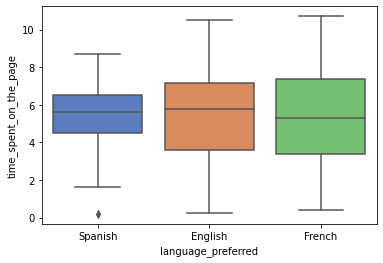

In [51]:
# visual analysis
# print a boxplot for visualization
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page',palette='muted');

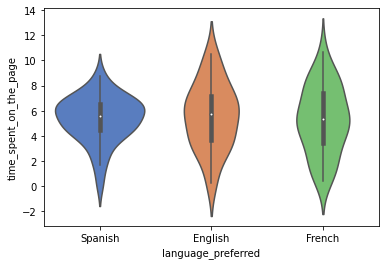

In [52]:
# print a violin plot for visualization
sns.violinplot(data=df, x='language_preferred', y='time_spent_on_the_page',palette='muted');

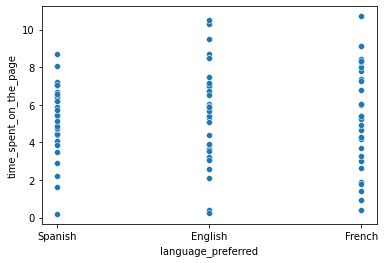

In [53]:
# print a scatterplot for visualization
sns.scatterplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='muted');

In [54]:
# print the mean time spent on the page by preferred language. 
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$, $\mu_3$ be the mean time spent on the page when a user chooses Spanish, English, and French as their preferred language, respectively. 

#### Null Hypothesis: 
* The mean time spent on the page is the same.
>$H_0:\mu_1 = \mu_2$ $ = \mu_3$

#### Alternate Hypothesis:
* At least one mean time spent on the page is not the same.  

### Step 2: Select Appropriate test

Test significance
* We are comparing three variables wherein the null hypothesis is $H_0:$ all population means are equal. 

Assumptions
* The populations are normally distributed.
* Samples are independent simple random samples.
* Population variances are equal. 

We must first determine if the populations are normally distributed before continuing with a One-way ANOVA test using Shapiro-Wilk's test. 

Then we must test if the population variances are equal in order to meet the assumptions of the One-way ANOVA test using Levene's test. 


##### Shapiro-Wilk's test
Null hypothesis
>$H_0:$ The mean time spent on the page follows a normal distribution. 

Alternative hypothesis

>$H_a:$ The mean time spent on the page does not follow a normal distribution. 

In [55]:
# determine population distribution using Shapiro-Wilk's test
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


In [56]:
# use an if - else loop to compare the p-value with alpha. 
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.')

The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.


Since the p-value of the Shapiro test is large, I fail to reject the null hypothesis that the mean time spent on the page follows a normal distribution. Therefore, there is statistical evidence to suggest the population is normally distributed. 

##### Levene's test
Null hypothesis
>$H_0:$ The population variances are equal. 

Alternative hypothesis

>$H_a:$ At least one population variance is different from the others. 

In [57]:
# determine population variance using Levene's test
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


In [58]:
# use an if - else loop to compare the p-value with alpha. 
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.')

The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.


Since the p-value is greater than the level of signifiance, we fail to reject the null hypothesis that the population variances are equal. Therefore, there is statistical evidence to suggest that the variances are homogenous. 

#### Meeting the Assumptions of the ANOVA test
Assumptions
* The populations are normally distributed. Yes, there is statistical evidence to suggest that the populations are normally distributed as shown by the Shapiro-Wilk's test. 
* Samples are independent simple random samples. Yes, samples are independent from a randomly selected population. 
* Population variances are equal. Yes, there is statistical evidence to support that the population variances are equal, as determined by the Levene's test performed above. 

### Step 3: Decide the significance level

As outlined in the problem statement, the level of significance will be .05.

### Step 4: Collect and prepare data

In [59]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'])


### Step 5: Calculate the p-value

In [60]:
# print the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Step 6: Compare the p-value with $\alpha$

In [61]:
# if-else loop to compare the p-value with alpha 
if p_value < 0.05:
    print('The p-value is less than the level of significance; therefore, we reject the null hypothesis.')
else:
    print('The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.')

The p-value is greater than the level of significance; therefore, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (87%) is greater than 5%, we fail to reject the null hypothesis. Based on statistical evidence, the mean time spent on the page is the same, regardless of the preferred language of the user.

## Conclusion and Business Recommendations

**Conclusions** 

**Objective Questions:**
1. Do users spend more time on the new landing page than on the existing landing page?
    * There is enough statistical evidence to support the claim that users spend more time on the new landing page than on the existing landing page. Therefore, the new landing page has increased engagement based on time spent on the home page. 
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    * The conversion rate for the new page is greater than the conversion rate for the old page based on statistical evidence. 
3. Does the converted status depend on the preferred language?
    * No, the converted status does not depend on the preferred language of the user. 
4. Is the time spent on the new page the same for the different language users?
    * Yes, the evidence suggests that the mean time spent on the page is the same for the different language users. 
    
**Observations:**
* Users spend between 5-6 minutes on the landing page, on average. 
* The minimum time spent on the page is .19 minutes.
* The median time spent on the page is 5.42 minutes. 
* The maximum time spent on the page is 10.71 minutes. 
* There was no discernible difference between the mean time individuals spent on the landing page based on their preferred language. 
* The new landing page converted more users into subscribers than the old landing page. 
    * 60% of users on the new landing page were converted. 
    * 42% of users on the old landing page were converted. 

**Business Recommendations**
* Based on the statistical findings of this report, the new landing page launced by E-News Express is effective at converting users into subscribers. 33/50 (60%) of users on the new landing page were converted into subscribers. The converted status did not depend on the preferred language of the user, so E-news Express should continue to add languages to their database in order to generate more subscriptions and capital. Additionally, the new landing page generates more interest, as users spent more time on average on the new landing page. 
* The new landing page should be adopted by E-news Express because it is proven to be effective at converting subscribers and it generates more interest than the old landing page. Users are more likely to subscribe when they are on the landing page long enough to become interested in the content. The new landing page is an effective tool to increase subscriptions and drive engagement. 

___